# P-VALUES

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chisquare
%matplotlib inline

Null hypothesis: Describes the status quo, no change to the status
Alternative Hypothesis: Describes that there is change.

Example: To measure the effect of a diet pill to reduce weight.

Null H: That the pill doest not have effect

Alt H: That the pill has effect

**Test Statisctic** A numerical value that summarizes the data and will help to determine the difference between the hypotyesis.

Since we want to know if the amount of weight lost between the groups is **meaningfully different**, we will use the difference in the means, also known as the mean difference, of the amount of weight lost for each group as the test statistic.

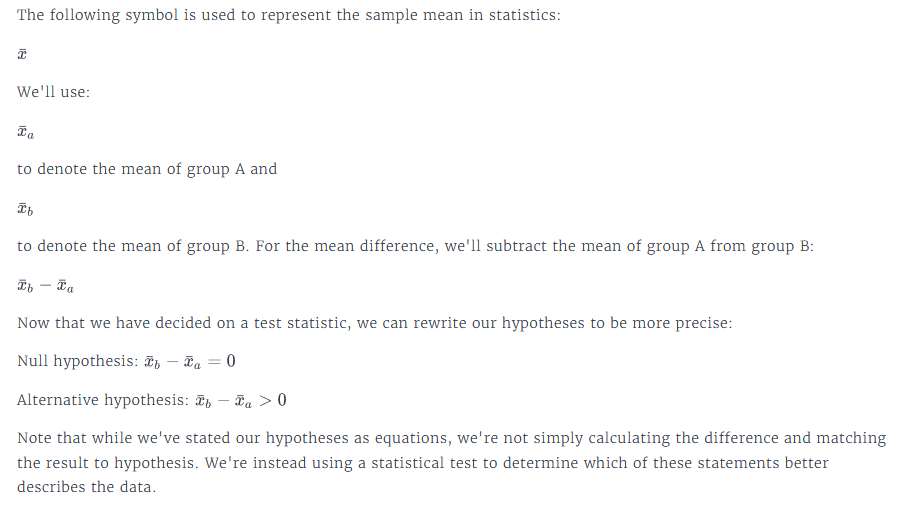


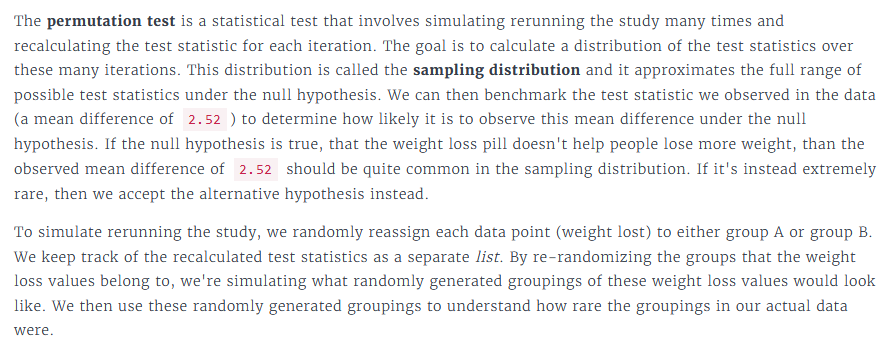

In [8]:
weight = pd.read_csv("weight_loss.csv")

In [9]:
weight.head()

,3,5
0,2,4
1,3,5
2,4,5
3,3,4
4,2,5


In [10]:
#Adding column 5 to column 3
allw = weight["3"].append(weight["5"])

In [11]:
# Randomizing the groups A and B
mean_difference = [] # Test statistic
for e in range(1000):
    groupA = []
    groupB = []
    for i in allw:
        ra = np.random.random()
        if ra >= 0.5:
            groupA.append(ra)
        else:
            groupB.append(ra)
    mean_diff = np.mean(groupA) - np.mean(groupB)
    mean_difference.append(mean_diff)

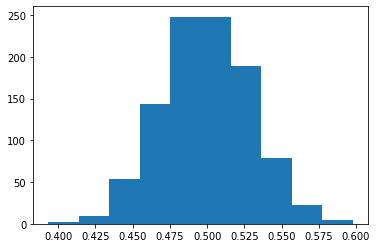

In [12]:
# This is the sample distribution generated by chance. The distriburtion of random differences generates
# this distribution, we can see that the difference of 2.25 is quite rare. 
plt.hist(mean_difference)
plt.show()

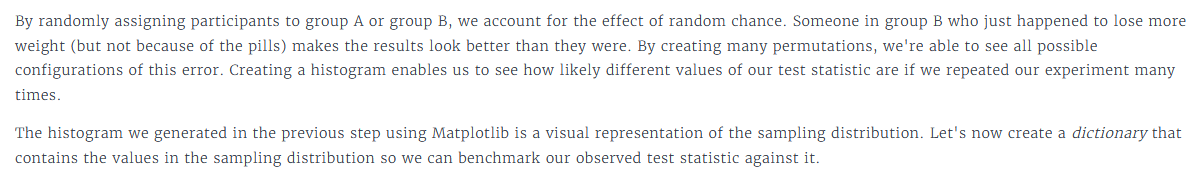

In [13]:
#Counting the frequency of mean differences
sampling_dis = {}
for e in mean_difference:
    if e in sampling_dis:
        sampling_dis[e] += 1
    else:
        sampling_dis[e] = 1

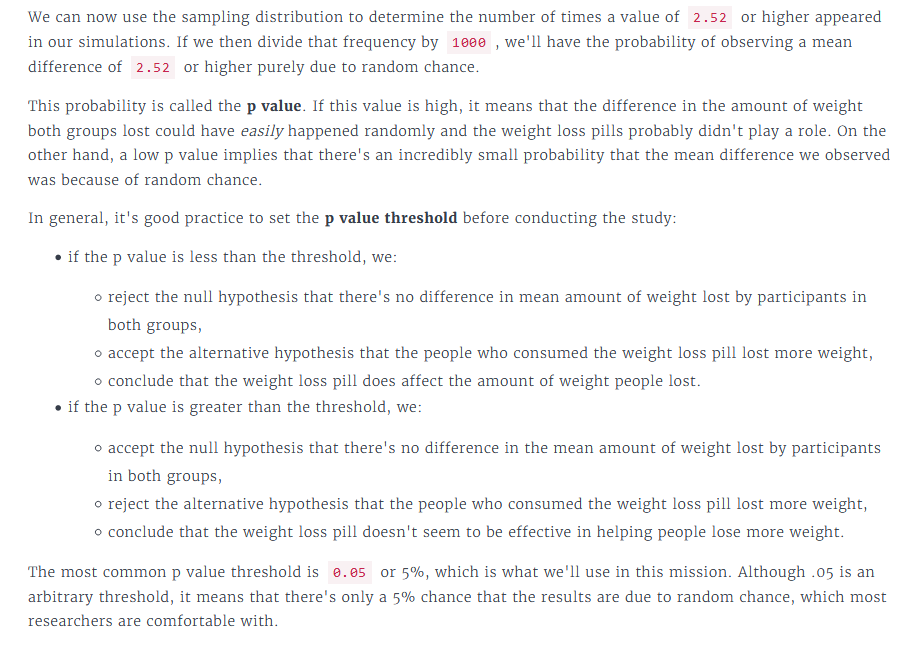

In [63]:
freq =0
for e in iter(sampling_dis):
    if e > 2.52:
        freq.append(sampling_dis[e])
p_value = np.sum(freq)/1000

In [61]:
p_value

0.0

Since the p_values is less than 0.05, it is cero, then we say that having a difference of 2.52 is acutally rare, by chance alone that difference is not common so we reject the NULL.

# CHI SQUARE


We'll be working with data on US income and demographics throughout this mission.
Each row represents a single person who was counted in the 1990 US Census, and contains information about their income and demographics. Here are some of the relevant columns:

    age -- how old the person is
    workclass -- the type of sector the person is employed in.
    race -- the race of the person.
    sex -- the gender of the person, either Male or Female
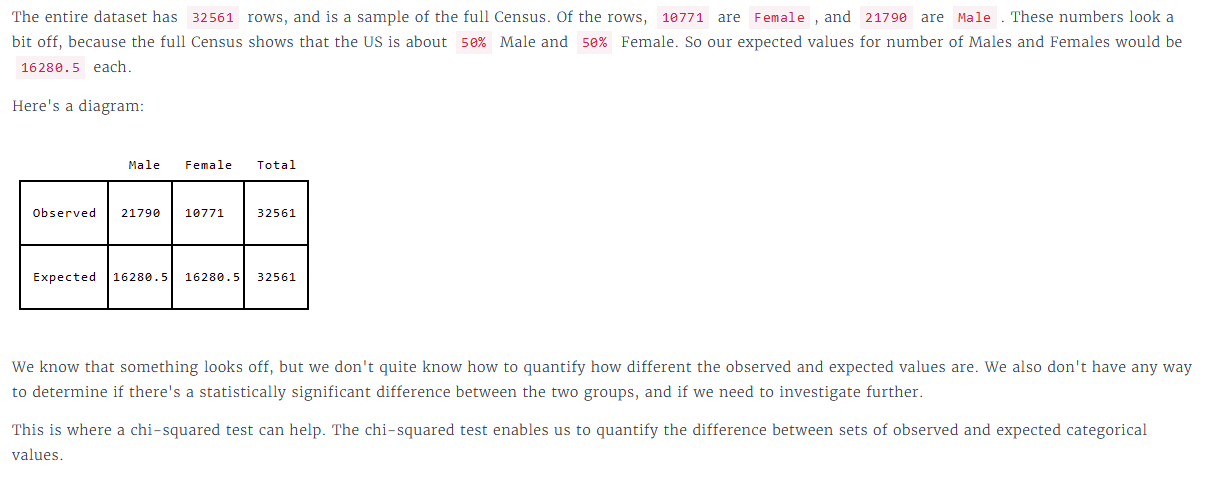

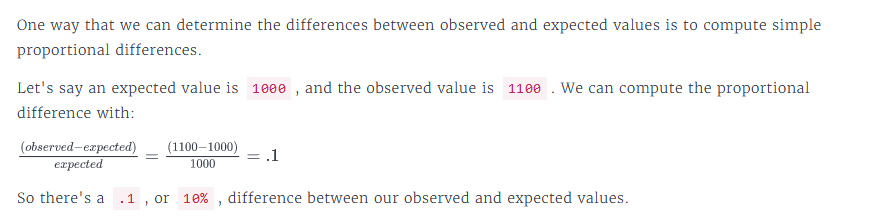

In [3]:
demo = pd.read_csv("income.csv")

In [4]:
demo.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,high_income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
demo.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'high_income'],
      dtype='object')

In [7]:
demo.sex.value_counts()

 Male      21790
 Female    10771
Name: sex, dtype: int64

In [30]:
# Calculate the proportional difference of observed and expected values
obsm = demo.sex.value_counts()[0]
obsf = demo.sex.value_counts()[1]
expected = demo.shape[0]/2
pm =(obsm - expected)/expected # because we want ot know how much deviates from the expected
pf = (obsf - expected)/expected
print("expected males: ",pm, " Expected females: ",pf)

expected males:  0.33841098246368356  Expected females:  -0.33841098246368356


As the sum of expec males and females add up to cero, we need to square the differences.

What we really want to find is one number that can tell us how much all of our observed counts deviate from all of their expected counterparts. This will let us figure out if our difference in counts is statistically significant. We can get one step closer to this by squaring the top term in our difference formula:
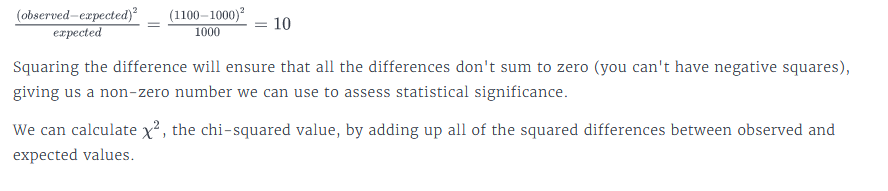

In [31]:
pm = (obsm - expected)**2/expected
pf = (obsf - expected)**2/expected 
chiq = pm + pf
print("chi square: ", chiq)

chi square:  3728.950615767329


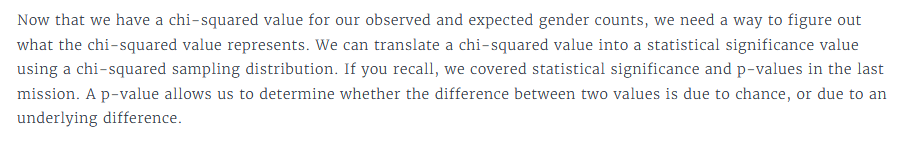

In [71]:
chiq_dis = []
expected = 32561/2
for e in range(1000):
    rand_vector = np.random.random(32561)
    male= 0
    female =0    
    for e in rand_vector:
        if e >= 0.5:
            male += 1
        else:
            female += 1
    pm = (male - expected)**2/expected
    pf = (female - expected)**2/expected
    chiq_dis.append(pf+pm)

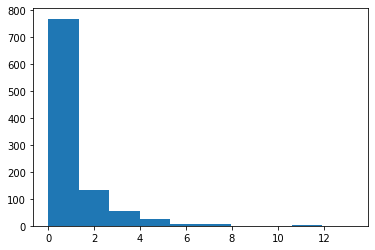

In [72]:
plt.hist(chiq_dis)
plt.show()

The chi vlaue calculated is 3728 but our chi on the simulation shows a distribution that has the hightest value of 12 so is much less than the calculated chi value. That means that by chance alone, the chi value is much less than the data results so the data results are biasied. 
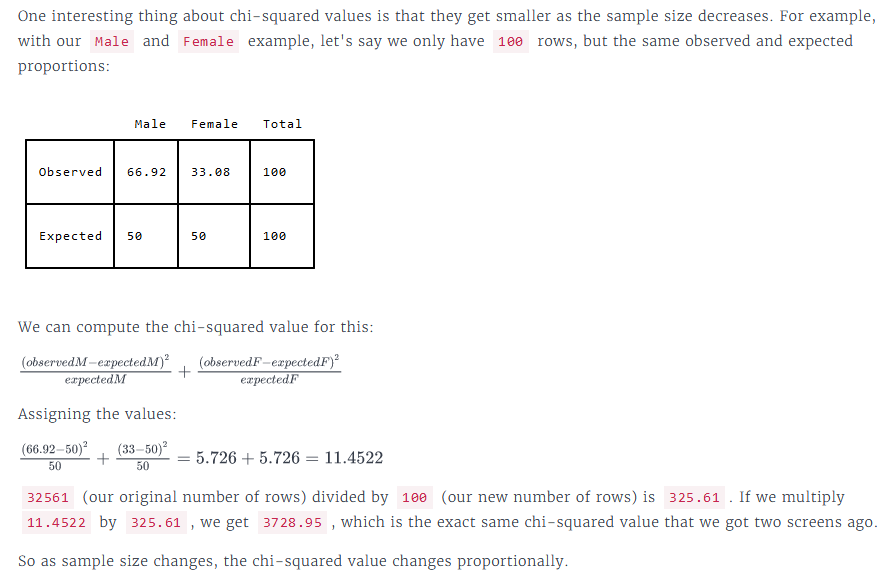

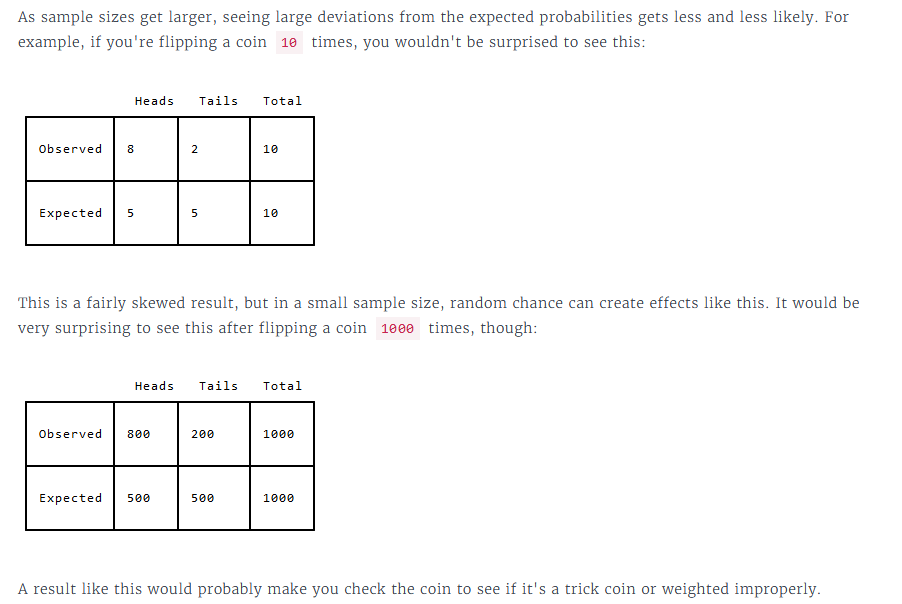

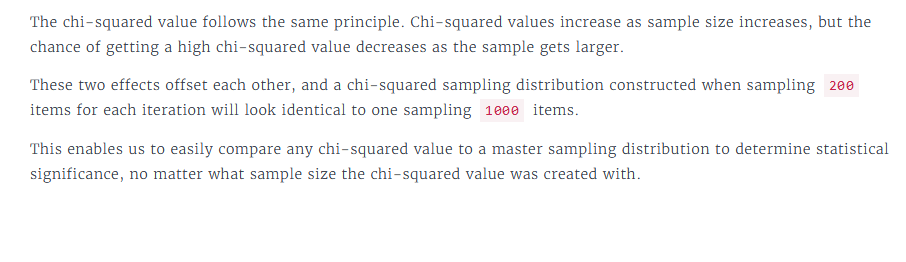

In [87]:
#pd.options.display.float_format = '{:,.2f}'.format
#pd.set_option('precision',2)
ran = np.round(np.random.random(300),3)

In [94]:
expected = 150
chi_q = []
for e in range(1000):
    ran = np.round(np.random.random(300),3)
    #generating ceros and ones at random
    for i, each in enumerate(ran):
        if each > 0.5:
            ran[i]= 1
        else:
            ran[i]= 0 
    males = sum(ran)
    fem = 300-males  
    male_diff = (males - expected)**2/expected
    fem_diff = (fem - expected)**2/expected
    chi_q.append(male_diff + fem_diff)

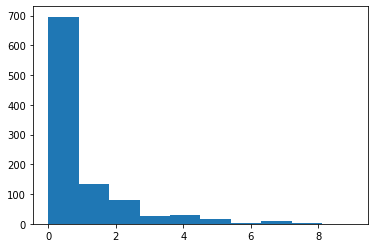

In [95]:
plt.hist(chi_q)
plt.show()

For 300 sample size we have the same results as previously with sample size of 32561, that shows that chi square is the same for the sample size in the random experiment.

## Degress of fredom.
Is the number of values than can vary and that does not affect the variation of the ther variable. In the example of males, females, if one is 16000 the other is the difference to add up to the total so, there is only one degree of freedom.
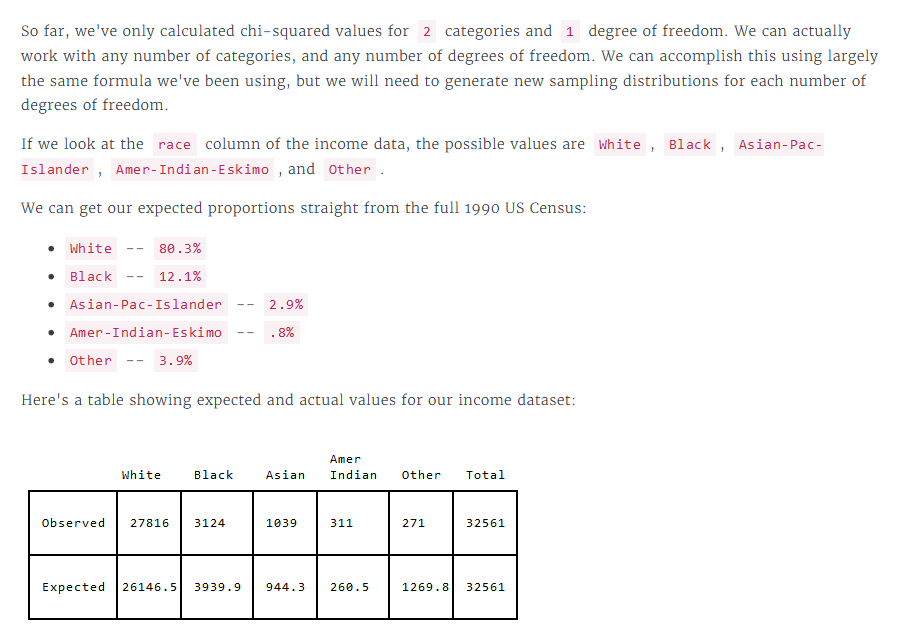

In [101]:
race_count = demo.race.value_counts()
race_count

 White                 27816
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: race, dtype: int64

In [106]:
white =(race_count[0] - 26146)**2/26146
black =(race_count[1] - 3939)**2/3939
asian =(race_count[2] - 944)**2/944
amer = (race_count[3] - 260)**2/260
other =(race_count[4] - 1269)**2/1269

In [108]:
chi_q =white + black + asian + amer +other
chi_q

1079.731591966481

There are 4 degrees of fredom, if we modify say White count then we would need to modify Asian count and all other 3 will remain unchanged. 
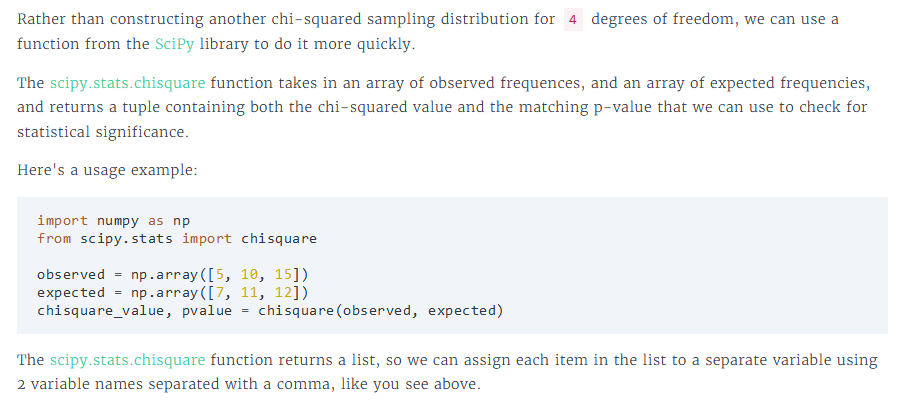

In [112]:
#Example
obs = np.array([20,38,67,74])
ex = np.array([23,37,65,74])
chiq, pvalue = chisquare(obs,ex)
print("chi square: ",chiq, "  pvalue: ",pvalue)

chi square:  0.47986983639157554   pvalue:  0.9232911339256803


In [113]:
# for the table on race
obs = np.array([27816, 3124,1039,311,271])
ex = np.array([26146,3939,944,260,1269])
chi, pvalue = chisquare(obs,ex)
print("chi square: ",chiq, "  pvalue: ",pvalue)

chi square:  0.47986983639157554   pvalue:  1.872204798306948e-232
